In [1]:
!pip install geopandas

In [2]:
!pip install rasterio

In [3]:
!pip install xarray

In [4]:
!pip install h5netcdf

In [5]:
!pip install netcdf4

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point
from rasterio.plot import show
import rasterio
import rasterio.features
import rasterio.warp

In [7]:
path="/home/ana/code/zilikons/demeter/raw_data/land_use.gpkg"
land_use=gpd.read_file(path)

In [8]:
land_use.head(4)

,country,fua_name,fua_code,code_2018,class_2018,prod_date,identifier,perimeter,area,comment,Pop2018,geometry
0,DE,Berlin,DE001L1,11100,Continuous urban fabric (S.L. : > 80%),2020-10,281-DE001L1,169.628613,1549.101213,NaN,4,"MULTIPOLYGON (((4594946.630 3211089.861, 45948..."
1,DE,Berlin,DE001L1,11240,Discontinuous very low density urban fabric (S...,2020-10,50285-DE001L1,418.916845,10405.048666,NaN,153,"MULTIPOLYGON (((4567351.284 3247553.321, 45672..."
2,DE,Berlin,DE001L1,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-10,12889-DE001L1,379.392590,7083.683610,NaN,65,"MULTIPOLYGON (((4551825.997 3252118.948, 45518..."
3,DE,Berlin,DE001L1,12100,"Industrial, commercial, public, military and p...",2020-10,61446-DE001L1,433.426566,10985.316622,NaN,1,"MULTIPOLYGON (((4561345.202 3263503.216, 45612..."


<Axes: >

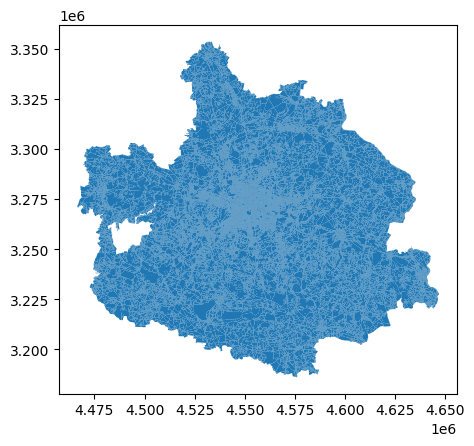

In [9]:
land_use.plot()


In [10]:
land_use.dtypes

country         object
fua_name        object
fua_code        object
code_2018       object
class_2018      object
prod_date       object
identifier      object
perimeter      float64
area           float64
comment        float64
Pop2018          int64
geometry      geometry
dtype: object

In [ ]:
path="/home/ana/code/zilikons/demeter/raw_data/tree_cover/tree_cover.gpkg"
tree_cover=gpd.read_file(path)

In [ ]:
tree_cover

In [ ]:
tree_cover.plot()

In [14]:
path="/home/ana/code/zilikons/demeter/raw_data/population/pop_C20.tif"

In [15]:
dataset = rasterio.open(path)
dataset.xy(row=0, col=0)

(959050.0, 6999950.0)

In [16]:
dataset_np=dataset.read()
data=np.squeeze(dataset_np)
df=pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.drop(df.values==0)

In [ ]:
#coordinates=[]
#for row in range(len(df)+1):
    #for col in df.columns:
       # coord=dataset.xy(row=row, col=col)
        #coordinates.append(coord)
        
   



In [ ]:
df.plot()

In [ ]:
{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}
{1: 'uint16'}

In [ ]:
dataset.bounds

In [ ]:
dataset.transform

In [ ]:
dataset.indexes
(1,)
band1 = dataset.read(1)
band1

In [ ]:
x, y = (dataset.bounds.left + 100000, dataset.bounds.top - 50000)
row, col = dataset.index(x, y)
#row, col

#band1[row, col]


In [ ]:
with rasterio.open (path) as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)

In [ ]:
g=pd.DataFrame(geom)
g

In [ ]:
g.info

In [ ]:
path="/home/ana/code/zilikons/demeter/raw_data/DE.gpkg"
de=gpd.read_file(path)

In [ ]:
de.plot()

In [ ]:
gbif=pd.read_csv("/home/ana/code/zilikons/demeter/raw_data/gbif.csv", sep='\t', on_bad_lines='skip')
gbif.head(2)

In [ ]:
gbif.columns

In [ ]:
gbif[['decimalLatitude', 'decimalLongitude']]

In [ ]:
gbif.plot()

In [ ]:
import xarray as xr

ds = xr.open_dataset('/home/ana/code/zilikons/demeter/raw_data/rural_urban_mask_Berlin.nc', decode_times=True, use_cftime=True)
df = ds.to_dataframe()




In [ ]:
df

In [ ]:
ds = xr.open_dataset('/home/ana/code/zilikons/demeter/raw_data/temp_berlin.nc', decode_times=True, use_cftime=True)
df_1 = ds.to_dataframe()

In [ ]:
df_1